In [3]:
import astropaint

from astropaint.lib import profile

import healpy as hp 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import rcParams
#%config InlineBackend.figure_format = "retina"

rcParams["figure.figsize"] = (10,7)
rcParams["text.usetex"] = True
rcParams["font.size"] = 18
rcParams["font.family"] = "stix"
rcParams["figure.dpi"]= 200

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Catalog

The `Catalog` object reads/simulates a halo catalog. The initial catalog must contain the following columns: 

`x` , `y`, `z`, `v_x`, `v_y`, `v_z`, `M_200c`

Instantiating the class without any input will simulate a set of randomly distributed halos

In [158]:
catalog = astropaint.Catalog()

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [159]:
catalog.data.head()

,x,y,z,v_x,v_y,v_z,M_200c,D_c,lat,lon,...,R_200c,c_200c,R_th_200c,rho_s,R_s,v_r,v_th,v_ph,v_lat,v_lon
0,-12.285652,-66.271553,73.872482,84.645523,47.452164,-26.201735,2.822402e+13,99.999998,47.622904,259.497538,...,0.641943,4.587056,22.068376,2.277668e+14,0.139947,-61.202413,-28.204461,74.577988,28.204461,74.577988
1,-30.196951,64.004120,70.651375,-82.773468,96.810249,94.343689,1.422007e+13,100.000000,44.951968,115.257797,...,0.510808,4.902443,17.560277,2.647054e+14,0.104195,153.612725,20.044973,33.551942,-20.044973,33.551942
2,12.982527,96.823715,-21.368717,-25.578037,-14.502280,-37.705032,7.893787e+14,100.000000,-12.338518,82.363093,...,1.948582,3.320529,66.987317,1.118413e+14,0.586829,-9.305240,40.631954,23.423885,-40.631954,23.423885
3,75.537239,58.366398,-29.790760,-21.351984,-54.478168,-78.069321,7.058492e+12,100.000001,-17.331972,37.692679,...,0.404446,5.247096,13.903840,3.090446e+14,0.077080,-24.668199,89.481079,-30.053508,-89.481079,-30.053508
4,92.819183,34.729984,13.357677,84.398621,-61.670708,-52.853474,4.675178e+11,100.000001,7.676330,20.514250,...,0.163640,6.827687,5.625531,5.699128e+14,0.023967,49.859886,60.051752,-87.336543,-60.051752,-87.336543


Extra parameters such as halo radius, distance, etc. can be build using the `build_dataframe()` method

In [160]:
catalog.build_dataframe()

Building the dataframe...

Done!


The data frame is stored in the `.data` attribute. 

In [6]:
catalog.data.head()

,x,y,z,v_x,v_y,v_z,M_200c,D_c,lat,lon,...,R_200c,c_200c,R_th_200c,rho_s,R_s,v_r,v_th,v_ph,v_lat,v_lon
0,63.344490,65.060104,-41.888649,34.798756,-63.386543,63.898941,5.326052e+10,100.000003,-24.764306,45.765484,...,0.079328,8.429130,2.727088,9.417154e+14,0.009411,-45.962659,-49.167298,-69.151231,49.167298,-69.151231
1,70.586159,-70.513123,6.744937,-85.117310,-23.037310,45.680721,3.862053e+10,100.000002,3.867500,315.029658,...,0.071268,8.696063,2.450023,1.015245e+15,0.008195,-40.755576,-48.540200,-76.454132,48.540200,-76.454132
2,-97.606300,-13.074726,-17.379917,70.235100,19.618919,-46.554974,1.904402e+11,99.999999,-10.008785,187.629565,...,0.121304,7.449162,4.170137,7.005369e+14,0.016284,-63.027787,58.397902,-10.120274,-58.397902,-10.120274
3,-98.092766,-17.737286,7.949727,3.314213,-18.788153,-48.438866,1.195279e+10,100.000001,4.559669,190.249561,...,0.048207,9.743826,1.657247,1.338127e+15,0.004947,-3.769253,48.292061,19.078050,-48.292061,19.078050
4,63.238846,14.480794,-76.099640,31.298704,-75.277588,-62.505802,9.038510e+14,100.000001,-49.552116,12.897559,...,2.038555,3.277198,70.080371,1.087301e+14,0.622042,56.458837,30.120458,-80.364527,-30.120458,-80.364527


In [7]:
catalog.data.columns

Index(['x', 'y', 'z', 'v_x', 'v_y', 'v_z', 'M_200c', 'D_c', 'lat', 'lon',
       'theta', 'phi', 'D_a', 'R_200c', 'c_200c', 'R_th_200c', 'rho_s', 'R_s',
       'v_r', 'v_th', 'v_ph', 'v_lat', 'v_lon'],
      dtype='object')

new random catalogs can be created using the `generate_random_halos()` method. If `put_on_shell` is `True` the halos will be distributed over a shell, otherwise they are uniformly distributed in a cubic box. 

In [161]:
catalog.data = catalog.generate_random_box(n_tot=1000,
                                           box_size=30,
                                           mass_min=1E14,
                                           mass_max=1E15,
                                           put_on_shell=True)

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [162]:
catalog.build_dataframe()
catalog.data.head()

Building the dataframe...

Done!


,x,y,z,v_x,v_y,v_z,M_200c,D_c,lat,lon,...,R_200c,c_200c,R_th_200c,rho_s,R_s,v_r,v_th,v_ph,v_lat,v_lon
0,-3.811226,-25.967922,14.530712,76.710548,18.678608,-75.472260,7.307677e+14,30.000000,28.970358,261.650497,...,1.899109,3.345472,217.621913,1.136564e+14,0.567666,-62.469052,51.681863,73.185129,-51.681863,73.185129
1,-13.351792,-22.722471,14.332442,57.599094,-36.050297,46.962456,3.494653e+14,29.999999,28.538429,239.561377,...,1.485109,3.593634,170.180943,1.326918e+14,0.413261,24.106246,-40.348172,67.923971,40.348172,67.923971
2,-21.322374,20.713184,-4.039841,-87.119926,36.286736,63.671116,3.957636e+14,29.999999,-7.739038,135.830287,...,1.547992,3.550526,177.386874,1.292563e+14,0.435990,78.399880,-74.910863,34.676234,74.910863,34.676234
3,26.973000,11.697669,5.968401,-52.974052,-33.516407,-73.176826,2.959338e+14,30.000000,11.475373,23.445446,...,1.405039,3.652062,161.005633,1.374361e+14,0.384725,-75.256054,59.392112,-9.672181,-59.392112,-9.672181
4,19.036524,-1.629694,23.129091,-2.781702,-29.720758,50.763557,2.054987e+14,30.000000,50.441048,355.106909,...,1.244209,3.783568,142.575827,1.484878e+14,0.328845,38.986558,-32.512197,-29.849714,32.512197,-29.849714


Let's put these halos on a canvas!

# Canvas 

The `Canvas` object locates the halo centers and extents on a healpy map. We can initialize it by feeding in a `Catalog` object and an `nside` for the map. 

In [163]:
canvas = astropaint.Canvas(catalog,
                           nside = 256,
                           analyze=False)

Let's check out the locations of the halos with a scatter plot

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


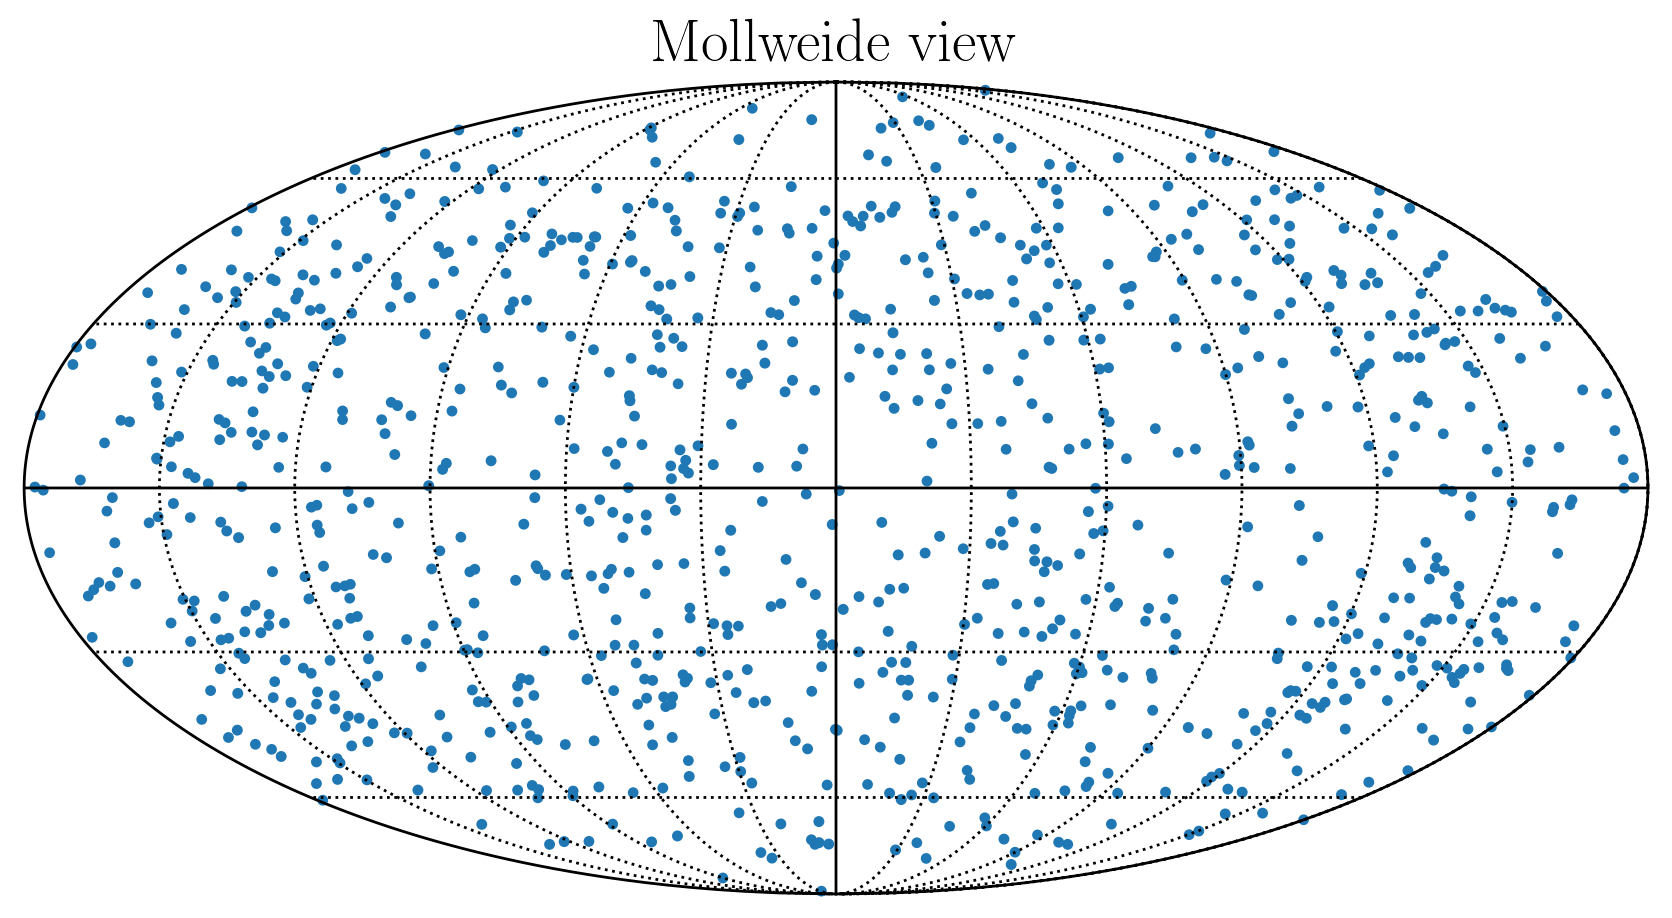

In [166]:
canvas.show_halo_centers("mollview",
                        marker='.',
                        )

and in cartesian projection

0.0 135.5224878140701 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


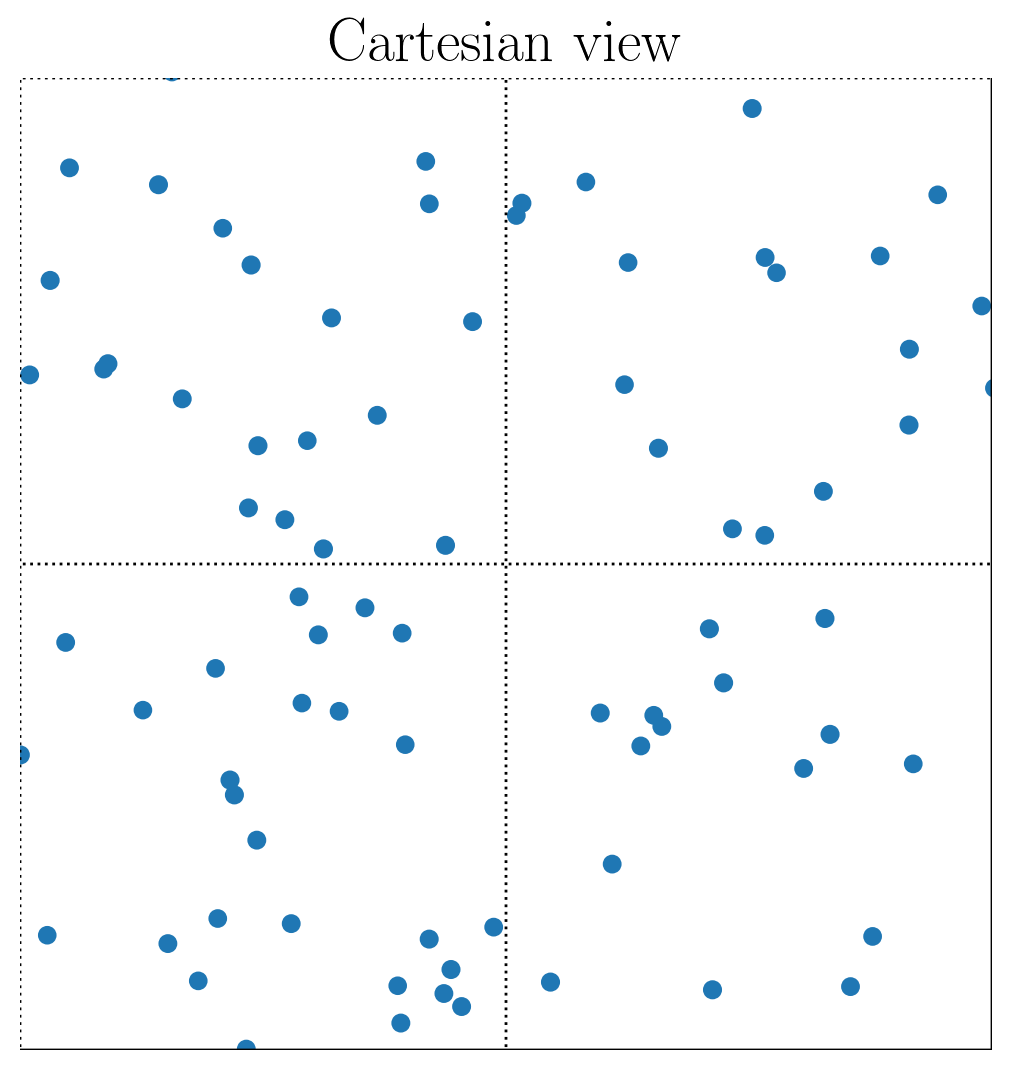

In [168]:
canvas.show_halo_centers("cartview",
                        lonra=[0,60],
                        latra=[0,60],
                        )

The canvas provides methods for finding the pixel number of halo centers, as well as their angular positions in spehrical coordinates

In [169]:
canvas.find_centers_indx()

Done! You can now get the center pixels using Canvas.centers_indx.


In [174]:
canvas.find_centers_ang()

Done! You can now get the angular position of the discs using Canvas.centers_ang.


Similarly you can find the pixels around each halo center using `find_discs_indx(R_times)`. The method finds all the pixels within `R_times` the virial radius of the halo center. 

In [170]:
canvas.find_discs_indx(R_times=1)

Done! You can now get the discs using Canvas.discs_indx.


And `find_discs_ang()` calculates the angular position of each pixel of the discs.

In [171]:
canvas.find_discs_ang()

Done! You can now get the angular position of the discs using Canvas.discs_ang.


Let's check out the discs

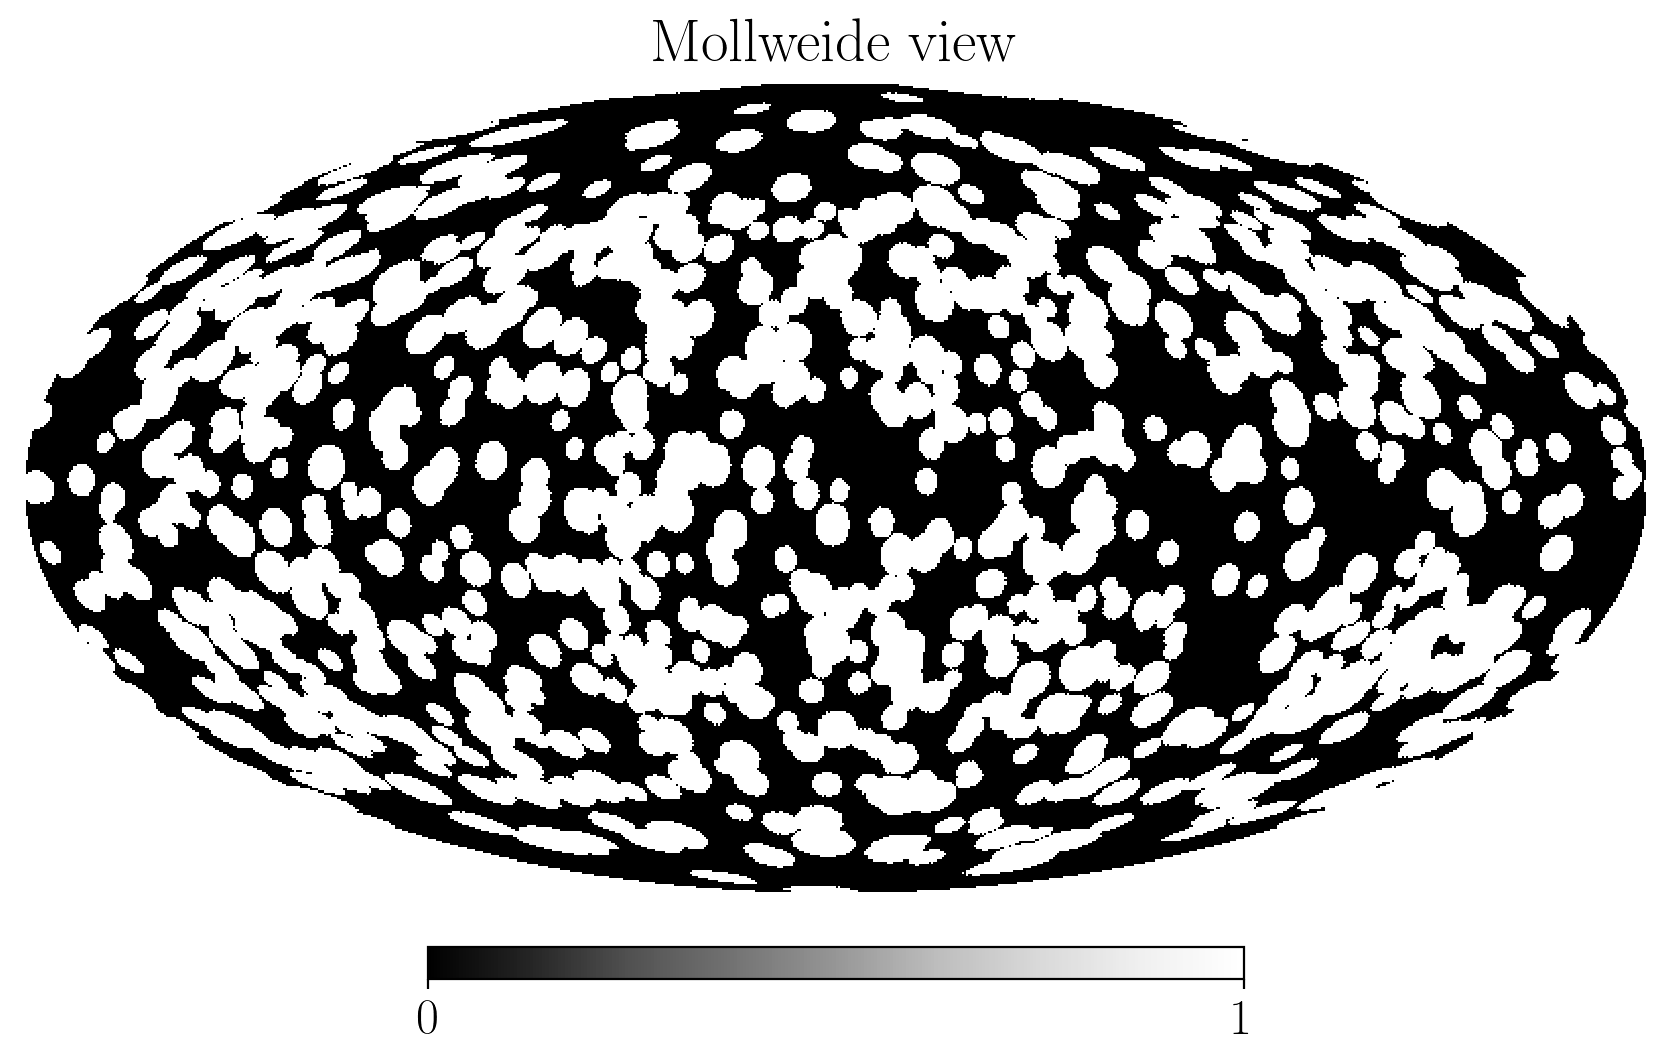

In [172]:
canvas.cmap = cm.Greys_r

canvas.show_discs()

`find_discs_2center_distance()` finds the angular distance of each pixel to the halo center in units of radians and also Mpc. 

In [175]:
canvas.find_discs_2center_distance()

The distances in radians can be accessed via `.discs_2center_rad` and in units of Mpc via `.discs_2center_mpc`.

# Painter

The `Painter` object paints a signal on top of the canvas according to an input template

In [177]:
painter = astropaint.Painter(template=profile.solid_sphere_proj)

The template 'solid_sphere_proj' takes in the following arguments:
['r', 'M_200c', 'R_200c']


In [178]:
# change the color map to RdYlBu
canvas.cmap = cm.RdYlBu_r

If the canvas has been painted on previously, it can be cleaned using `.clean()`

In [179]:
canvas.clean()

The painter paints the signal on the canvas using the `.spray()` method

In [180]:
painter.spray(canvas)

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!
Your artwork is fininshed. Check it out with Canvas.show_map()


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


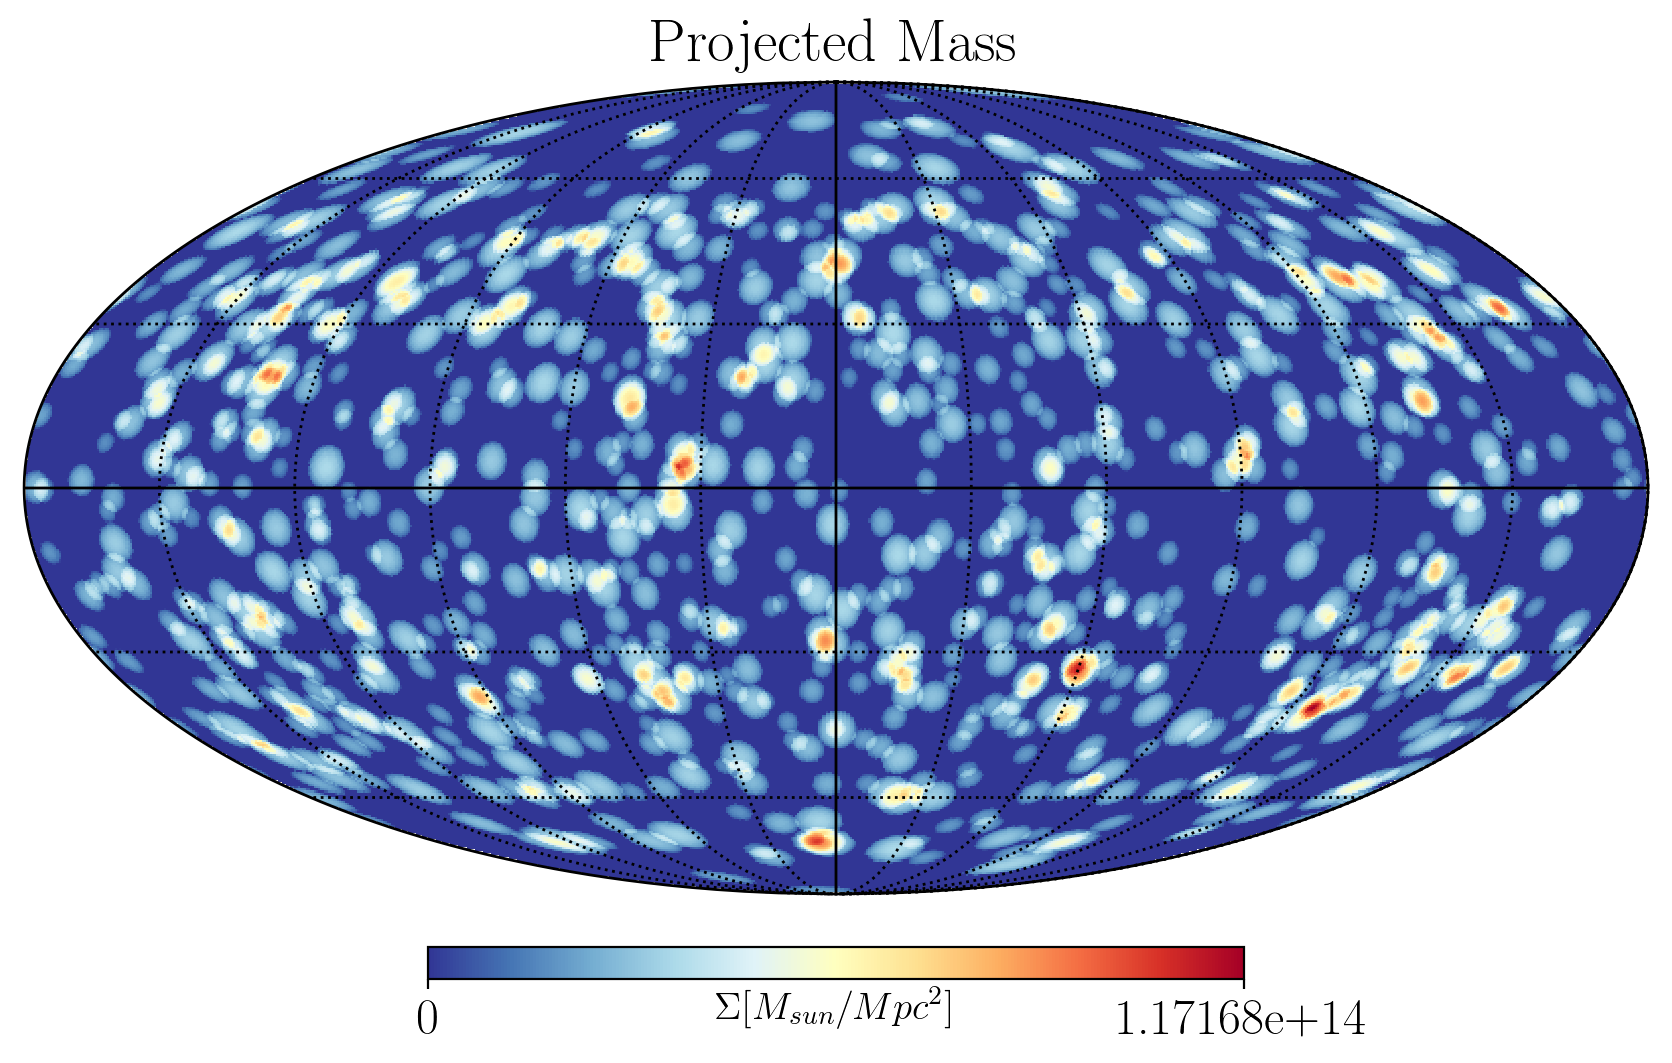

In [195]:
canvas.show_map(projection="mollview",
                title="Projected Mass",
                unit="$\Sigma [M_{sun}/Mpc^2$]")
hp.graticule()

33.59037789072914 116.40962210927087 -27.870395409510863 57.87039540951086
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


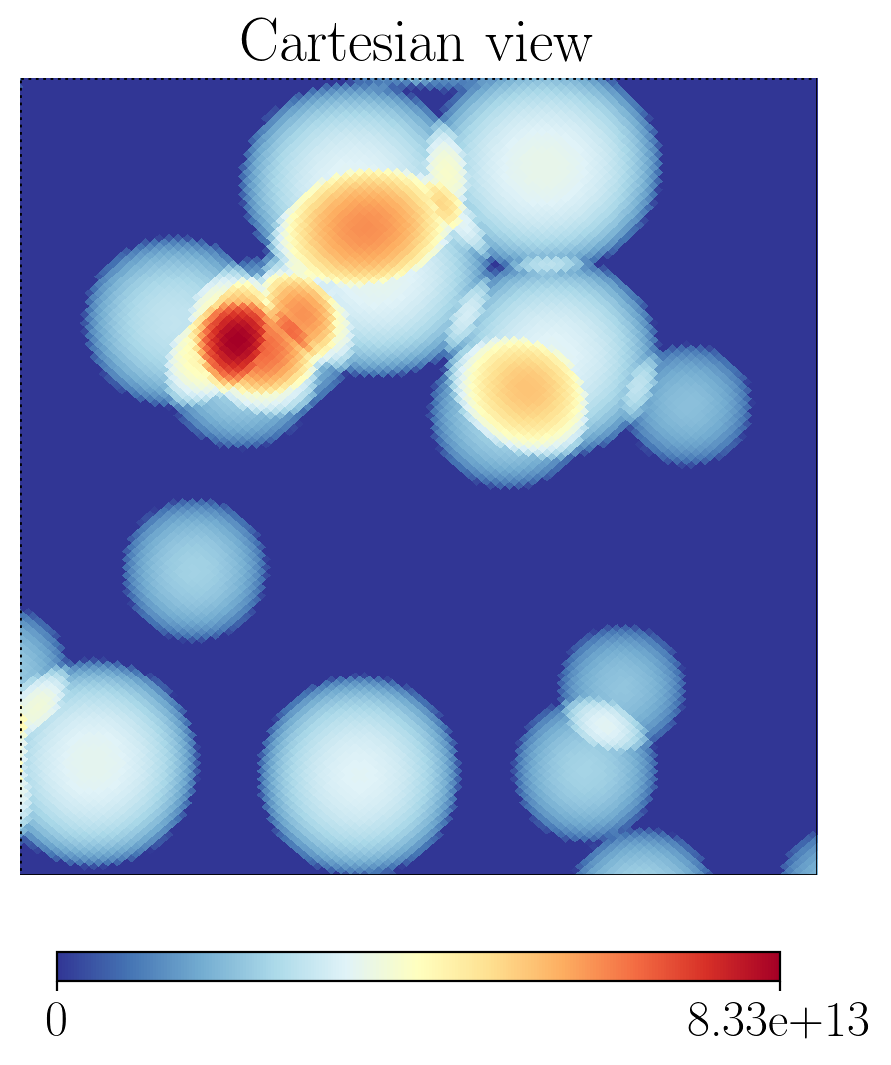

In [182]:
canvas.show_map(projection="cartview",
               lonra=[0,30],
               latra=[0,30])
hp.graticule()


# kinetic Sunyaev Zeldovich (in progress...)

Now let's try to make a more realistic map. We will generate a larger catalog and then paint the kSZ signal over the halos. 

In [4]:
catalog = astropaint.Catalog()
catalog.data = catalog.generate_random_box(n_tot=100000,
                                           box_size=30,
                                           mass_min=1E14,
                                           mass_max=1E15,
                                           put_on_shell=True)

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!
generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [10]:
canvas = astropaint.Canvas(catalog,
                           nside=512)

Done! You can now get the center pixels using Canvas.centers_indx.
Done! You can now get the angular position of the discs using Canvas.centers_ang.
Done! You can now get the discs using Canvas.discs_indx.
Done! You can now get the angular position of the discs using Canvas.discs_ang.


In [11]:
kSZ_painter = astropaint.Painter(template=profile.kSZ_T_NFW)
kSZ_painter.spray(canvas)

The template 'kSZ_T_NFW' takes in the following arguments:
['r', 'rho_s', 'R_s', 'v_r']
Painting the canvas...
Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!
Your artwork is fininshed. Check it out with Canvas.show_map()


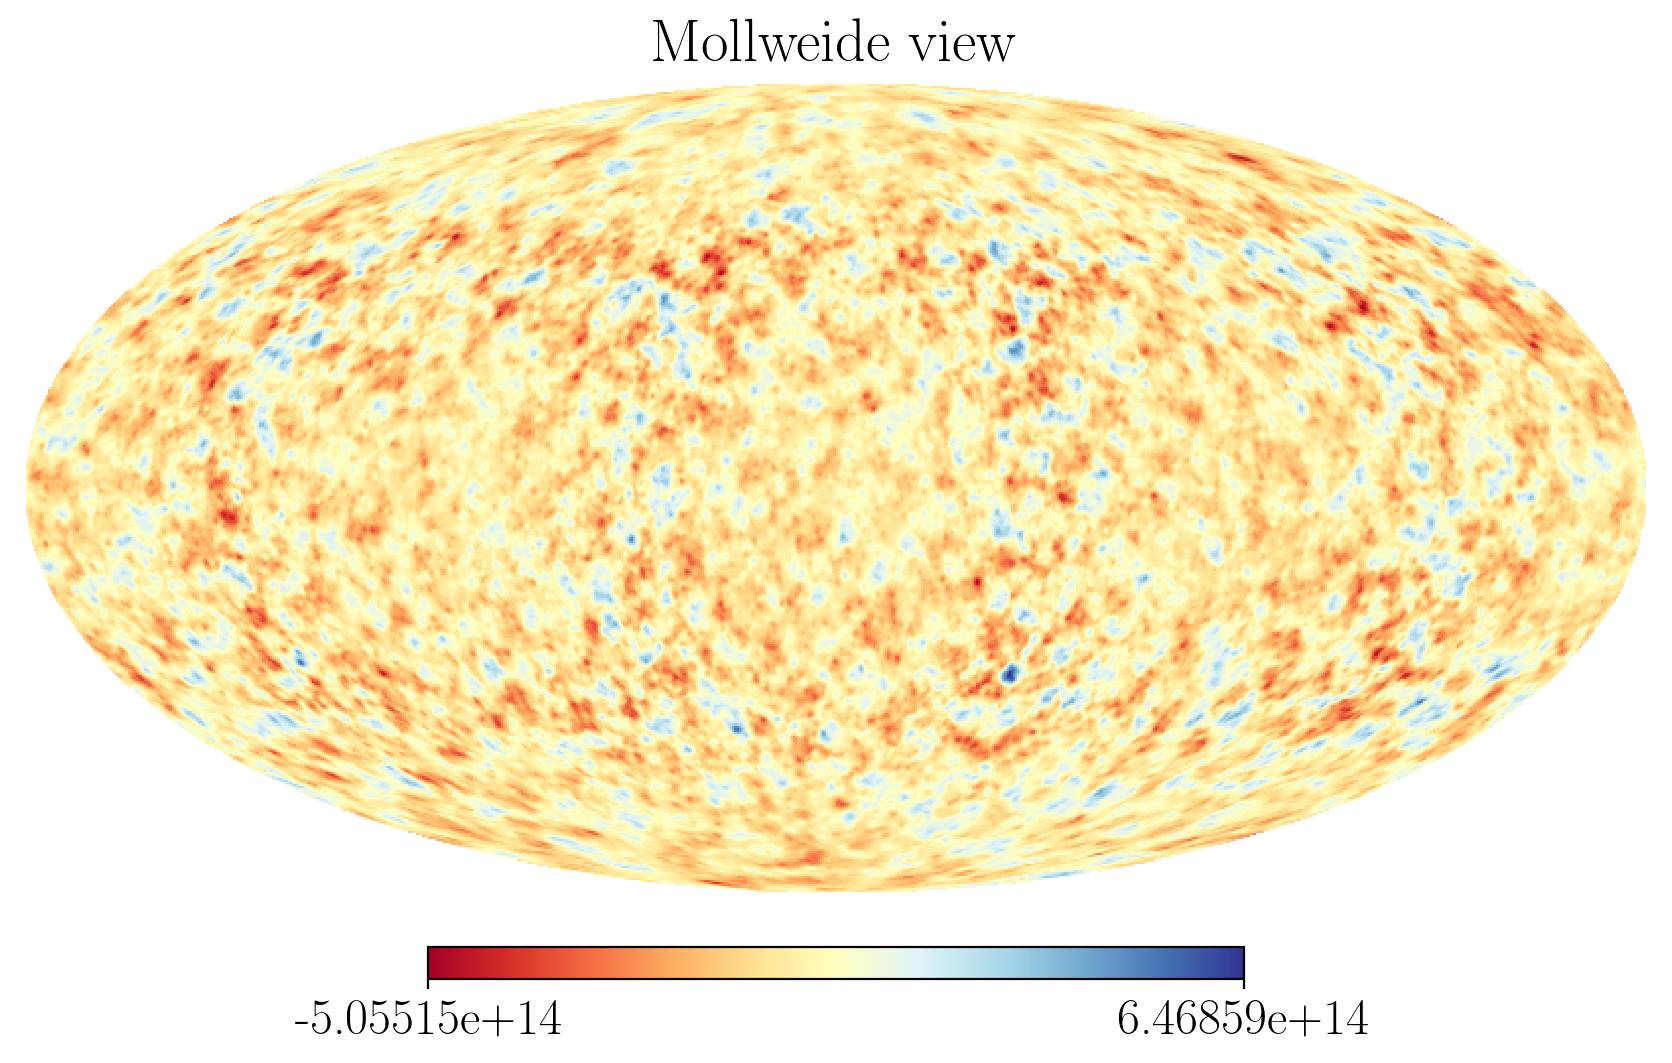

In [12]:
canvas.cmap = cm.RdYlBu
canvas.show_map()

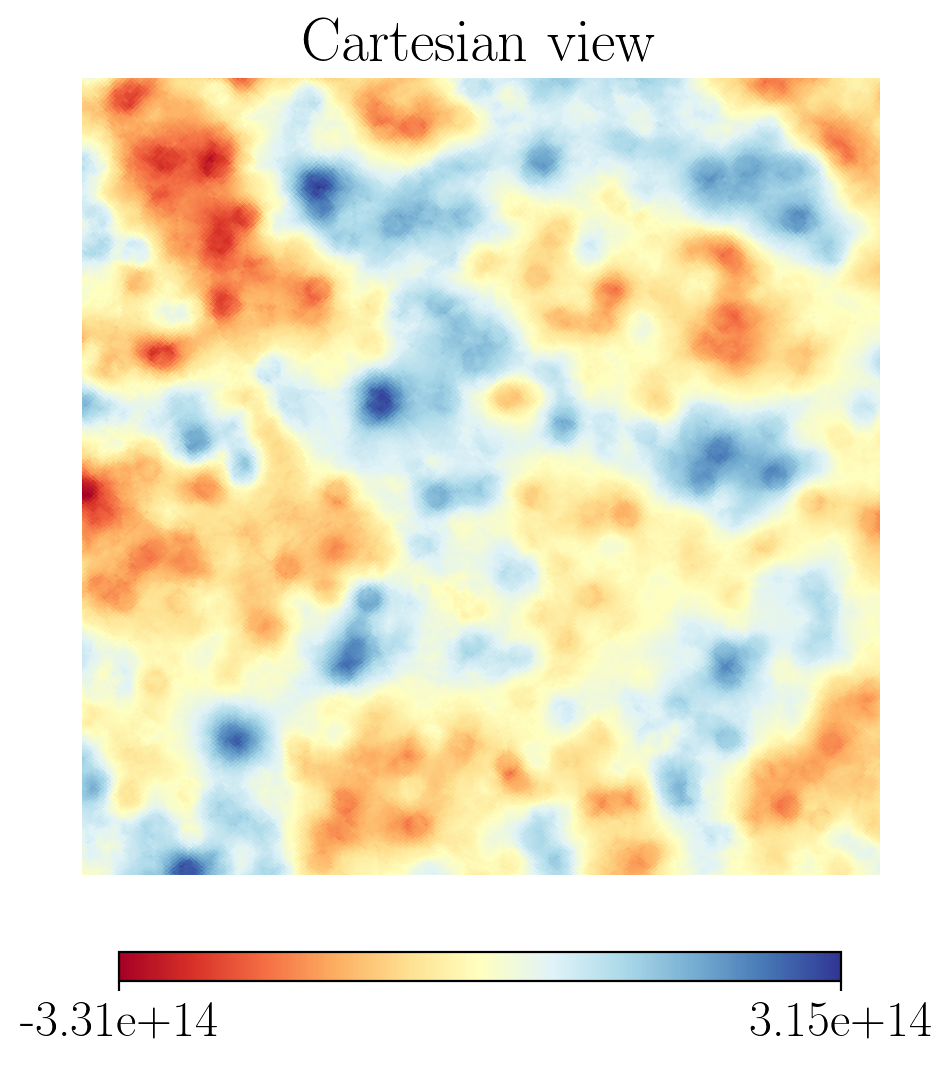

In [13]:
canvas.show_map("cartesian",
               lonra=[0,30],
               latra=[0,30])